## Random Forest on “Cardiotography” dataset

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [78]:
data = pd.read_csv("C:\\Users\\black\\Desktop\\ml_py\\datasets\\CTG.csv")

In [79]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

<AxesSubplot:xlabel='ASTV', ylabel='MSTV'>

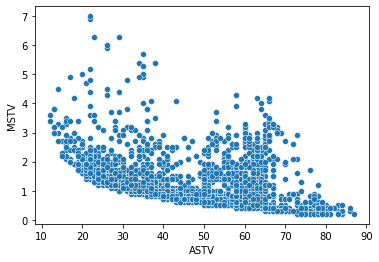

In [81]:
sns.scatterplot(x = "ASTV", y = "MSTV", data=data)

## Single Independent Variable

In [ ]:
# Splitting the data

In [131]:
x = data.iloc[:, 7:8].values
y = data.iloc[:, 21:].values

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=40, stratify=y)

In [ ]:
#Scaling the data

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Building model

In [149]:
rf = RandomForestClassifier(n_estimators=300, random_state=0)

In [136]:
rf.fit(x_train, y_train.ravel())

RandomForestClassifier(n_estimators=300)

In [ ]:
# Predicting 

In [137]:
y_pred = rf.predict(x_test)

In [ ]:
# Confusion-matrix

In [138]:
confusion_matrix(y_test, y_pred)

array([[465,  24,   8],
       [ 51,  33,   4],
       [ 29,  10,  14]], dtype=int64)

In [ ]:
# Accuracy

In [139]:
accuracy_score(y_test, y_pred)

0.8025078369905956

In [140]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2554858934169279
Mean Squared Error: 0.3714733542319749
Root Mean Squared Error: 0.6094861394912725


## Multiple Independent Variables 

In [ ]:
# Splitting the data

In [145]:
x = data[["LB","ASTV","MSTV","Variance"]]
y = data.iloc[:, 21:]

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=40, stratify=y)

In [ ]:
#Scaling the data

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Building model

In [153]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [154]:
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(random_state=0)

In [ ]:
# Predicting 

In [155]:
y_pred = rf.predict(x_test)

In [ ]:
# Confusion-matrix

In [156]:
confusion_matrix(y_test, y_pred)

array([[475,  12,  10],
       [ 19,  66,   3],
       [  5,  11,  37]], dtype=int64)

In [ ]:
# Accuracy

In [157]:
accuracy_score(y_test, y_pred)

0.9059561128526645

In [158]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11755485893416928
Mean Squared Error: 0.164576802507837
Root Mean Squared Error: 0.40568066568156413
